# Chapitre 4 : Chargement et analyse

In [1]:
# Update libraries
!pip install -U pip
!pip install -U numpy
!pip install -U pandas
!pip install -U scikit-learn
!pip install -U seaborn

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils 

## Charger les données avec Pandas

A partir d'ici, les commentaires des codes seront uniquement en anglais.

In [2]:
import pandas as pd

# Loading the datasets
iris_df = pd.read_csv("data/iris.csv")
titanic_df = pd.read_csv("data/titanic_train.csv")

In [3]:
# See the first lines
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Boston dataset is a more complex one (txt without headers)
names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df = pd.read_fwf("data/boston.txt", skiprows=22, header=None, names=names)

In [5]:
# Get the size of the dataset (lines #, rows #)
iris_df.shape

(150, 5)

## Gestion des types

In [6]:
# Original types
iris_df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class            object
dtype: object

In [7]:
# Set the class as a category (and not a string)
iris_df['class'] = iris_df['class'].astype('category')
iris_df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
class           category
dtype: object

In [8]:
# Titanic original types
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# Changing dtypes / index
titanic_df = titanic_df.set_index('PassengerId')
titanic_df['Survived'] = titanic_df['Survived'].astype('bool')
titanic_df['Pclass'] = titanic_df['Pclass'].astype('category')
titanic_df['Sex'] = titanic_df['Sex'].astype('category')
titanic_df['Embarked'] = titanic_df['Embarked'].astype('category')
titanic_df.dtypes

Survived        bool
Pclass      category
Name          object
Sex         category
Age          float64
SibSp          int64
Parch          int64
Ticket        object
Fare         float64
Cabin         object
Embarked    category
dtype: object

## Données manquantes

In [10]:
# Counting iris values (150 lines) => no missing values
iris_df.count()

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
class           150
dtype: int64

In [11]:
# Same for Titanic (891 lines) => missing values on some fields
titanic_df.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

In [12]:
# Nb of missing values
titanic_df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Statistiques descriptives sur les données numériques

In [13]:
# Compute the mean
iris_df['sepal_length'].mean()

5.843333333333335

In [14]:
# Compute the median
iris_df['sepal_length'].median()

5.8

In [15]:
# Compute the min
iris_df['sepal_length'].min()

4.3

In [16]:
# Compute standard deviation
iris_df['sepal_length'].std()

0.8280661279778629

In [17]:
# Compute the first quartile (25% of data)
iris_df['sepal_length'].quantile(0.25)

5.1

In [18]:
# All statistics for a field
iris_df['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [19]:
# All statistics for all (numerical) fields
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
# Same for the Fare field on Titanic: lower price is 0 (free travel?), and a very hight std
titanic_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

## Graphiques sur les données numériques

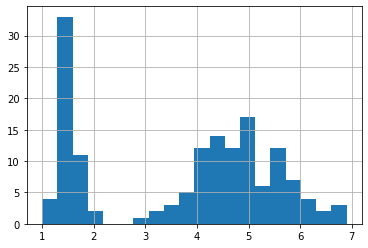

In [21]:
# Histogram on the whole iris dataset for the petal length => not a gaussian
iris_df['petal_length'].hist(bins=20)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe690253ad0>,
      dtype=object)

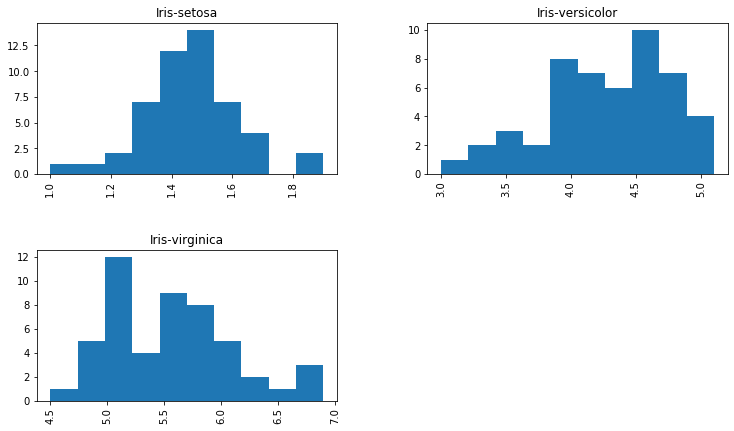

In [22]:
# Same by class => something more like 3 gaussians
iris_df['petal_length'].hist(by=iris_df['class'], figsize=(12,7))

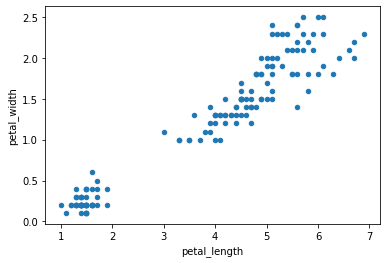

In [23]:
# Scatterplot : petal length vs petal width
iris_df.plot(kind='scatter', x='petal_length', y='petal_width')

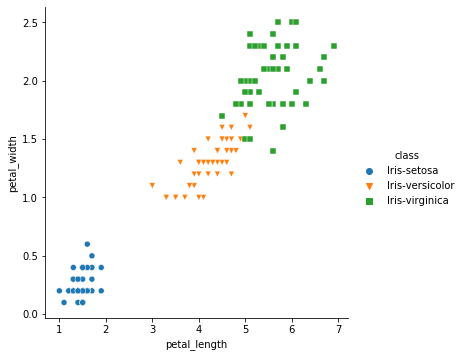

In [24]:
# With a legend on the class (using Seaborn)
import seaborn as sns

sns.pairplot(iris_df, x_vars=['petal_length'], y_vars=['petal_width'], height=5, hue='class', markers=['o', 'v', 's'])

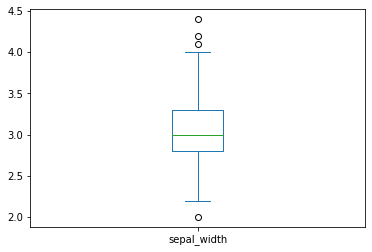

In [25]:
# Box plot on sepal width
iris_df['sepal_width'].plot.box()

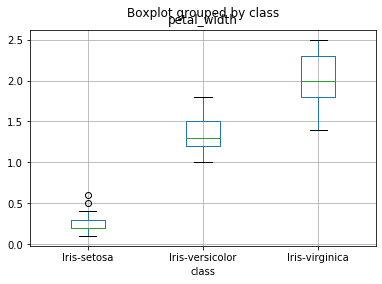

In [26]:
# Same by class
iris_df.boxplot(column='petal_width', by='class')

## Statistiques descriptives sur les données catégorielles

In [27]:
# Statistics on Titanic "Embarked"
titanic_df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [28]:
# Count by value
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
# Modalities list
titanic_df['Embarked'].cat.categories

Index(['C', 'Q', 'S'], dtype='object')

## Graphiques sur les données catégorielles

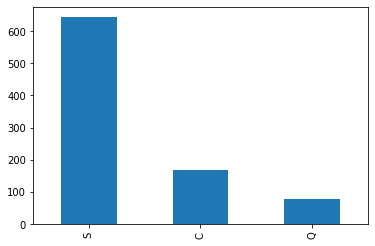

In [30]:
# Bar graph on "Embarked"
titanic_df['Embarked'].value_counts().plot(kind='bar')

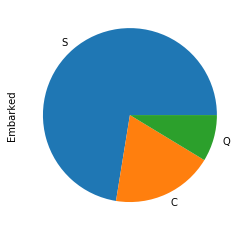

In [31]:
# Pie chart on "Embarked"
titanic_df['Embarked'].value_counts().plot(kind='pie')

In [32]:
# If "Age" was a category, compute the value_counts => a lot of modalities !
titanic_df['Age'].fillna(0).astype('int').value_counts()

0     184
24     31
22     27
28     27
30     27
     ... 
12      1
53      1
80      1
66      1
74      1
Name: Age, Length: 71, dtype: int64

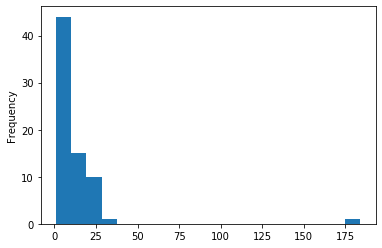

In [33]:
# Histogram on these counts => a lot of ages with few values (<50) and one with a lot of values ('0' meaning missing or baby < 1yo)
titanic_df['Age'].fillna(0).astype('int').value_counts().plot(kind='hist', bins=20)

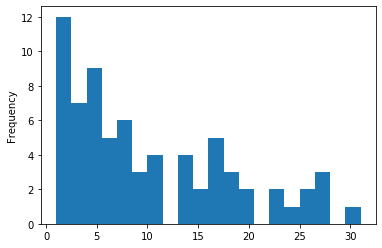

In [34]:
# Same without missing values => histogram is more "classic"
titanic_df['Age'].dropna().astype('int').value_counts().plot(kind='hist', bins=20)

## Statistiques bivariées (deux variables)

In [35]:
# Correlation matrix on iris => petal length, petal width and sepal length are higly correlated. Sepal width has a low correlation to other measures
iris_df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [36]:
# Absolute correlations regarding sepal length
iris_df.corrwith(iris_df['sepal_length']).abs()

sepal_length    1.000000
sepal_width     0.109369
petal_length    0.871754
petal_width     0.817954
dtype: float64

In [37]:
# Sepal length statistics by class
iris_df.groupby('class')['sepal_length'].describe().transpose()

class,Iris-setosa,Iris-versicolor,Iris-virginica
count,50.00000,50.000000,50.00000
mean,5.00600,5.936000,6.58800
std,0.35249,0.516171,0.63588
min,4.30000,4.900000,4.90000
25%,4.80000,5.600000,6.22500
50%,5.00000,5.900000,6.50000
75%,5.20000,6.300000,6.90000
max,5.80000,7.000000,7.90000


In [38]:
# Survivors regarding "Embarked" on Titanic
titanic_df.groupby('Survived')['Embarked'].value_counts()

Survived   
False     S    427
          C     75
          Q     47
True      S    217
          C     93
          Q     30
Name: Embarked, dtype: int64

In [39]:
# Surviving rate by city => Cherbourg ('C') is correlated with a high rate of survivors
titanic_df.groupby('Embarked')['Survived'].value_counts(normalize=True)

Embarked  Survived
C         True        0.553571
          False       0.446429
Q         False       0.610390
          True        0.389610
S         False       0.663043
          True        0.336957
Name: Survived, dtype: float64

In [40]:
# Cross tab 
pd.crosstab(titanic_df['Survived'], titanic_df['Embarked'])

Embarked,C,Q,S
Survived,,,
False,75,47,427
True,93,30,217
